# Estudio de marcas y dispositivos


In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('default')
plt.rcParams['figure.figsize'] = (22, 10)
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

In [172]:
df = pd.read_csv('./data/events.csv', low_memory=False)
df.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Analizo las marcas mas visitadas

In [193]:
marca_filter = df.filter(items=['model'])
marca_filter = marca_filter[marca_filter.model.notnull()]
marca_filter["Cantidad"] = 1
marca_filter = marca_filter.groupby(by='model').agg({'Cantidad': 'sum'})
marca_filter.index
marca_filter = marca_filter.reset_index()
marca_filter.set_index('model', inplace=True)
marca_filter

,Cantidad
model,
Asus Live,4
Asus Zenfone 2,142
Asus Zenfone 2 Deluxe,203
Asus Zenfone 2 Laser,12
Asus Zenfone 3 Max 32 GB,132
Asus Zenfone 3 Max 16 GB,174
Asus Zenfone 3 Zoom,44
Asus Zenfone 5,729
Asus Zenfone 6,590


In [194]:
apple_filter = marca_filter.filter(like='iP', axis=0)
apple_filter = apple_filter.sort_values(by='Cantidad', ascending=False)
apple_filter

,Cantidad
model,
iPhone 6,50916
iPhone 5s,44878
iPhone 6S,39296
iPhone 7,27556
iPhone 7 Plus,18792
iPhone SE,16531
iPhone 6S Plus,12855
iPhone 6 Plus,12766
iPhone 5c,12689


In [195]:
apple_filter.Cantidad.sum()
#Cantidad total de eventos de apple

258499

In [196]:
samsung_filter = marca_filter.filter(like='Samsung', axis=0)
samsung_filter.sort_values(by='Cantidad', ascending=False)

,Cantidad
model,
Samsung Galaxy S7 Edge,23926
Samsung Galaxy S7,19337
Samsung Galaxy S8,16959
Samsung Galaxy J5,13044
Samsung Galaxy S6 Flat,11608
Samsung Galaxy S6 Edge,11175
Samsung Galaxy S8 Plus,10502
Samsung Galaxy J7 Prime,9312
Samsung Galaxy J7,7195


In [197]:
motorola_filter = marca_filter.filter(like='Moto', axis=0)
motorola_filter.sort_values(by='Cantidad', ascending=False)

,Cantidad
model,
Motorola Moto G4 Plus,8080
Motorola Moto X Play 4G Dual,6828
Motorola Moto G3 4G,5156
Motorola Moto X2,5143
Motorola Moto G5,4947
Motorola Moto G5 Plus,4272
Motorola Moto Z Play,3255
Motorola Moto G2 3G Dual,2870
Motorola Moto X Style,2863


In [198]:
asus_filter = marca_filter.filter(like='Asus', axis=0)
asus_filter.sort_values(by='Cantidad', ascending=False)

,Cantidad
model,
Asus Zenfone 5,729
Asus Zenfone 6,590
Asus Zenfone 2 Deluxe,203
Asus Zenfone 3 Max 16 GB,174
Asus Zenfone 2,142
Asus Zenfone 3 Max 32 GB,132
Asus Zenfone Selfie,49
Asus Zenfone 3 Zoom,44
Asus Zenfone 2 Laser,12


In [199]:
lg_filter = marca_filter.filter(like='LG', axis=0)
lg_filter.sort_values(by='Cantidad', ascending=False)

,Cantidad
model,
LG G4 H818P,1306
LG G5 SE,1183
LG G3 D855,1122
LG L Prime D337,941
LG K10 Novo,927
LG K10 TV,900
LG G4 H815P,568
LG Prime Plus H522,468
LG G3 Beat D724,323


In [200]:
black_filter = marca_filter.filter(like='berry', axis=0)
black_filter.sort_values(by='Cantidad', ascending=False).head(10)

,Cantidad
model,
Blackberry Blackberry Z30,1


In [201]:
sony_filter = marca_filter.filter(like='Sony', axis=0)
sony_filter.sort_values(by='Cantidad', ascending=False).head(10)

,Cantidad
model,
Sony Xperia Z3 Plus,1548
Sony Xperia M4 Aqua Dual,1033
Sony Xperia Z3 Dual,910
Sony Xperia Z5,797
Sony Xperia Z2,793
Sony Xperia Z3 TV,714
Sony Xperia Z3 Compact,700
Sony Xperia M4 Aqua,284
Sony Xperia Z5 Premium,144


In [202]:
lenovo_filter = marca_filter.filter(like='Lenovo', axis=0)
lenovo_filter.sort_values(by='Cantidad', ascending=False).head(10)

,Cantidad
model,
Lenovo Vibe K5,2751
Lenovo Vibe A7010 Dual Chip,2028


In [203]:
marcas = pd.DataFrame({'Marca': ["Apple", "Samsumg", "Motorola", "Lenovo", "Sony","LG","Asus", "Blackberry"], 'Cantidad': [apple_filter.Cantidad.sum(), samsung_filter.Cantidad.sum(), motorola_filter.Cantidad.sum(),lenovo_filter.Cantidad.sum(), sony_filter.Cantidad.sum() , lg_filter.Cantidad.sum(), asus_filter.Cantidad.sum(), black_filter.Cantidad.sum()]})
marcas = marcas.sort_values(by='Cantidad', ascending=False)
marcas

,Marca,Cantidad
0,Apple,258499
1,Samsumg,218127
2,Motorola,63518
5,LG,9724
4,Sony,7025
3,Lenovo,4779
6,Asus,2091
7,Blackberry,1


Text(0,0.5,'Cantidad de Eventos')

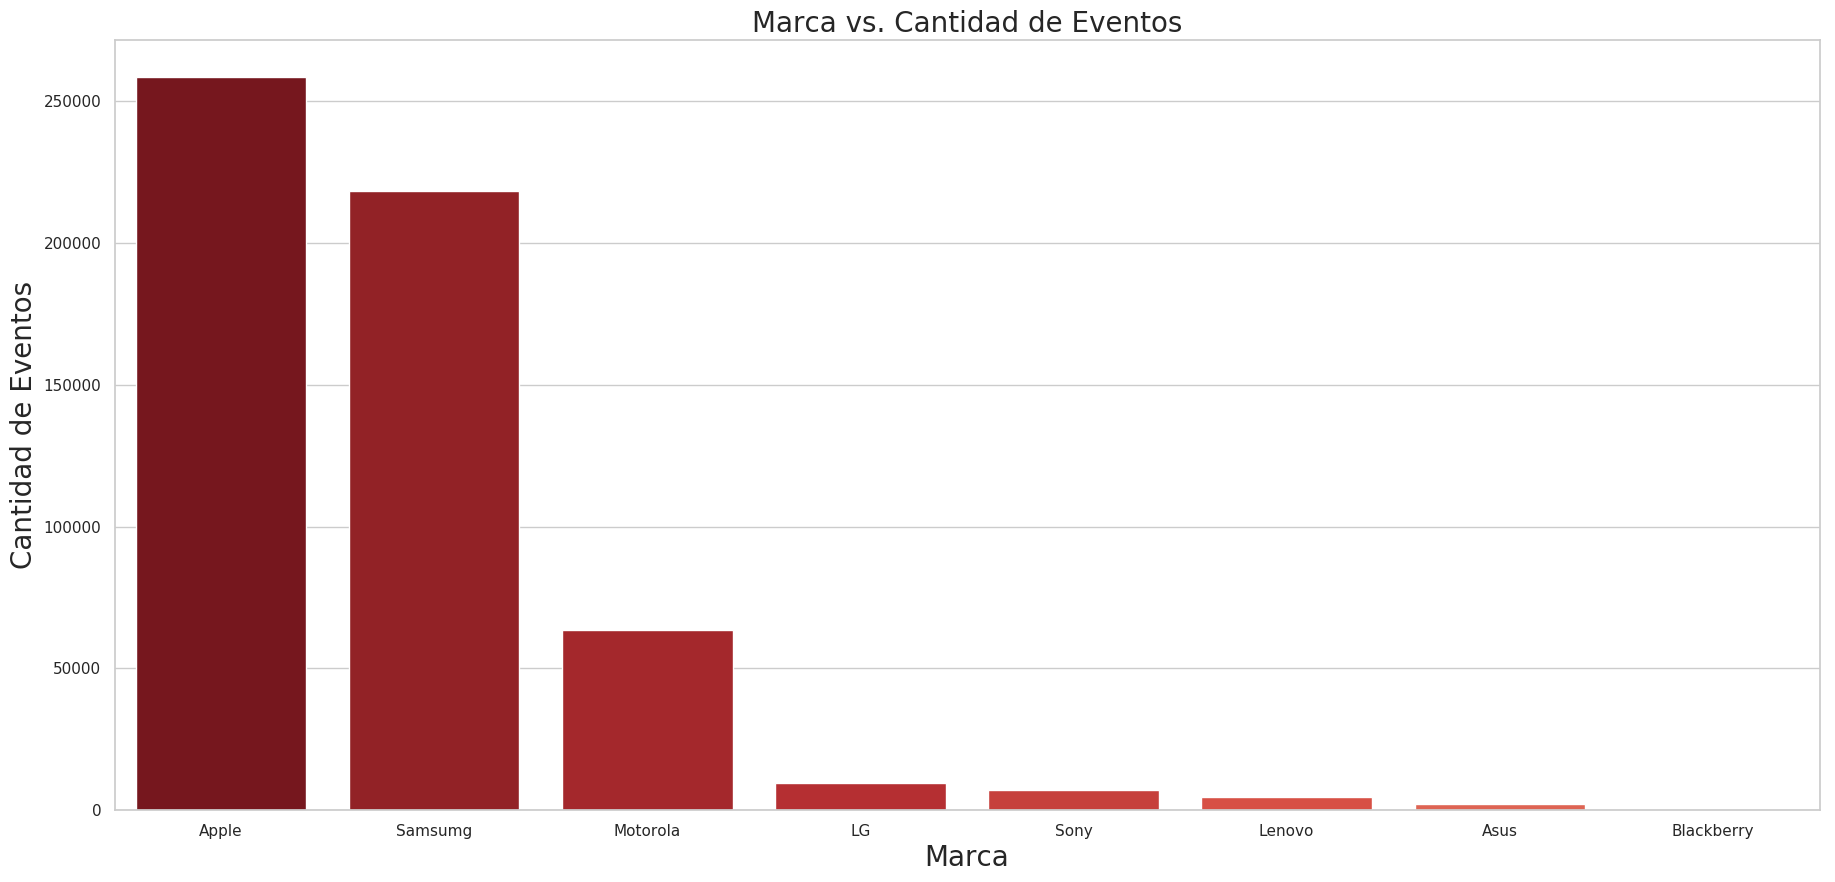

In [204]:
plt.rcParams["axes.labelsize"] = 30
marcas_plot = sns.barplot(x=marcas["Marca"], y=marcas['Cantidad'], orient='v',  palette=sns.color_palette('Reds_r', 15))
marcas_plot.set_title("Marca vs. Cantidad de Eventos", fontsize=20)
marcas_plot.set_xlabel("Marca", fontsize=20)
marcas_plot.set_ylabel("Cantidad de Eventos", fontsize=20)

## Cantidad de dispositivos por marca 

In [205]:
apple_filter["Cantidad"] = 1
black_filter["Cantidad"] = 1
lg_filter["Cantidad"] = 1
asus_filter["Cantidad"] = 1
motorola_filter["Cantidad"] = 1
samsung_filter["Cantidad"] = 1
lenovo_filter["Cantidad"] = 1
sony_filter["Cantidad"] = 1

marcas_cantidad_dispositivos = pd.DataFrame({'Marca': ["Apple", "Samsumg", "Motorola", "Lenovo", "Sony","LG","Asus", "Blackberry"], 'Cantidad': [apple_filter.Cantidad.sum(), samsung_filter.Cantidad.sum(), motorola_filter.Cantidad.sum(),lenovo_filter.Cantidad.sum(), sony_filter.Cantidad.sum() , lg_filter.Cantidad.sum(), asus_filter.Cantidad.sum(), black_filter.Cantidad.sum()]})
marcas_cantidad_dispositivos = marcas_cantidad_dispositivos.sort_values(by='Cantidad', ascending=False)
marcas_cantidad_dispositivos

,Marca,Cantidad
1,Samsumg,90
0,Apple,32
2,Motorola,29
5,LG,21
6,Asus,11
4,Sony,10
3,Lenovo,2
7,Blackberry,1


Text(0,0.5,'Cantidad de dispositivos')

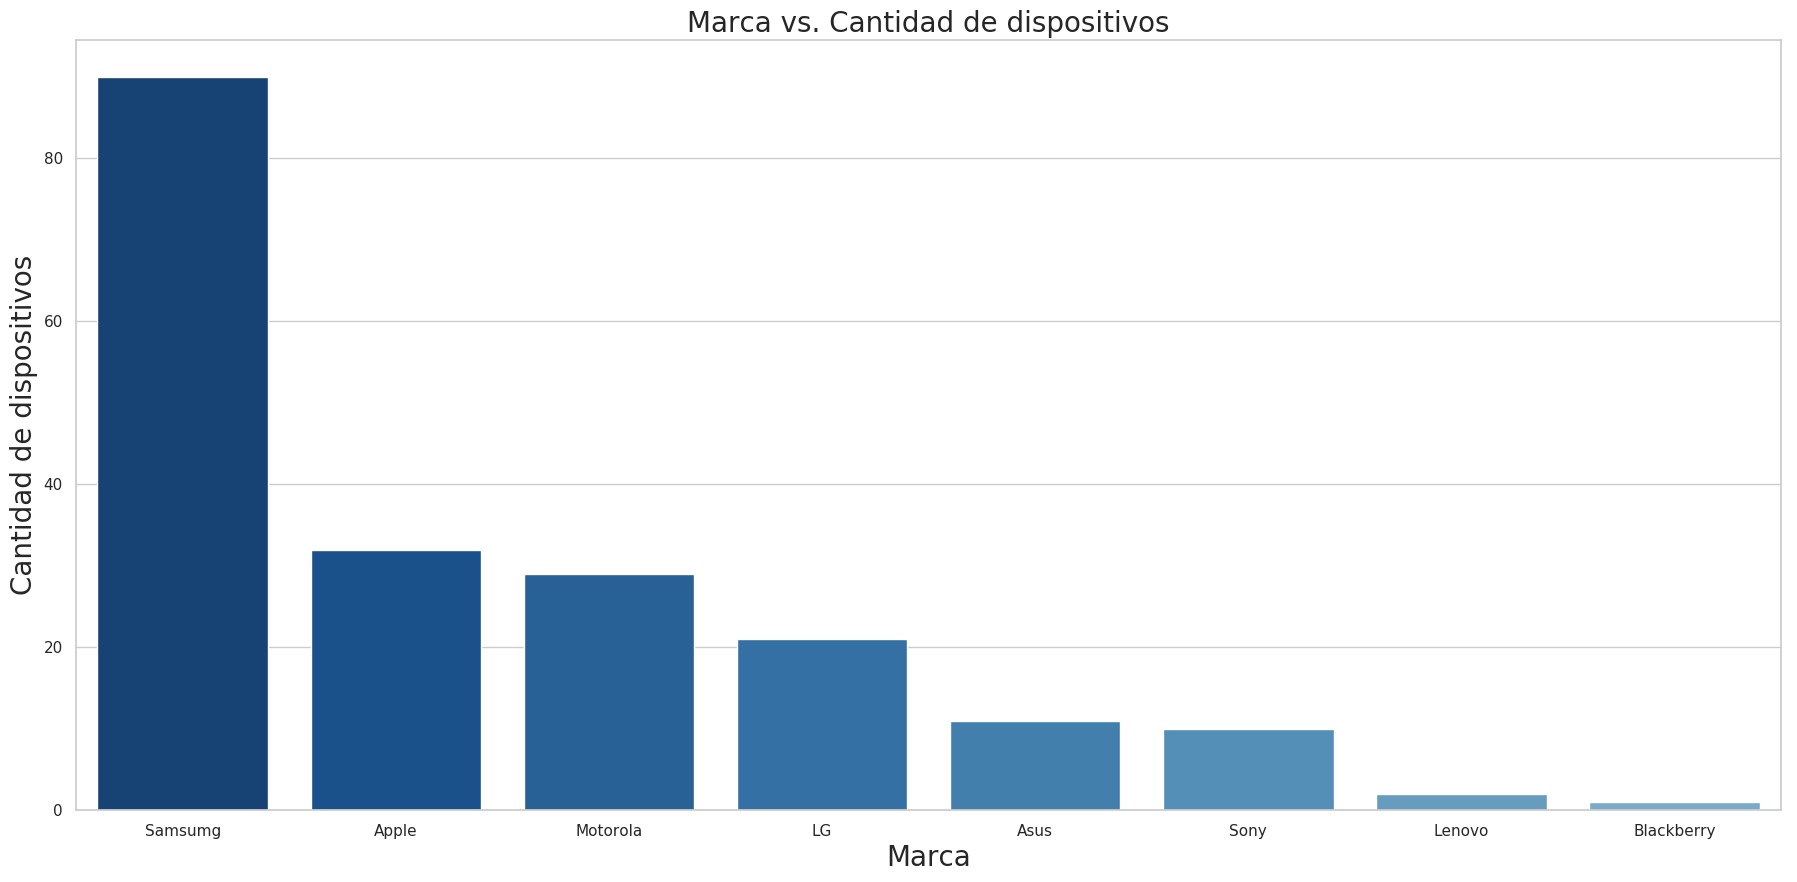

In [207]:
plt.rcParams["axes.labelsize"] = 30
marcas_plot = sns.barplot(x=marcas_cantidad_dispositivos["Marca"], y=marcas_cantidad_dispositivos['Cantidad'], orient='v', palette=sns.color_palette('Blues_r', 15))
marcas_plot.set_title("Marca vs. Cantidad de dispositivos", fontsize=20)
marcas_plot.set_xlabel("Marca", fontsize=20)
marcas_plot.set_ylabel("Cantidad de dispositivos", fontsize=20)

## Conversiones de cada marca

In [141]:
marca_filter = df.filter(items=['model','event'])
marca_filter = marca_filter[marca_filter.model.notnull()]
marca_filter = marca_filter[marca_filter.event == "conversion"]
marca_filter["Cantidad"] = 1
marca_filter = marca_filter.groupby(by='model').agg({'Cantidad': 'sum'})
marca_filter.index
marca_filter = marca_filter.reset_index()
marca_filter.set_index('model', inplace=True)


marca_filter

,Cantidad
model,
Asus Zenfone 3 Max 16 GB,1
Asus Zenfone 5,1
LG G3 D855,6
LG G4 H815P,2
LG G4 H818P,1
LG K10,3
LG K10 Novo,2
LG K10 TV,3
LG L Prime D337,3


In [142]:
apple_filter = marca_filter.filter(like='iP', axis=0)
black_filter = marca_filter.filter(like='berry', axis=0)
lg_filter = marca_filter.filter(like='LG', axis=0)
asus_filter = marca_filter.filter(like='Asus', axis=0)
motorola_filter = marca_filter.filter(like='Moto', axis=0)
samsung_filter = marca_filter.filter(like='Samsung', axis=0)
lenovo_filter = marca_filter.filter(like='Lenovo', axis=0)
sony_filter = marca_filter.filter(like='Sony', axis=0)



In [143]:
marcas_conversiones =  pd.DataFrame({'Marca': ["Apple", "Samsumg", "Motorola", "Lenovo", "Sony","LG","Asus", "Blackberry"], 'Cantidad': [apple_filter.Cantidad.sum(), samsung_filter.Cantidad.sum(), motorola_filter.Cantidad.sum(),lenovo_filter.Cantidad.sum(), sony_filter.Cantidad.sum() , lg_filter.Cantidad.sum(), asus_filter.Cantidad.sum(), black_filter.Cantidad.sum()]})
marcas_conversiones= marcas_conversiones.sort_values(by='Cantidad', ascending=False)
marcas_conversiones

,Marca,Cantidad
1,Samsumg,641
0,Apple,323
2,Motorola,149
4,Sony,23
5,LG,20
3,Lenovo,14
6,Asus,2
7,Blackberry,0


Text(0,0.5,'Cantidad de Conversiones')

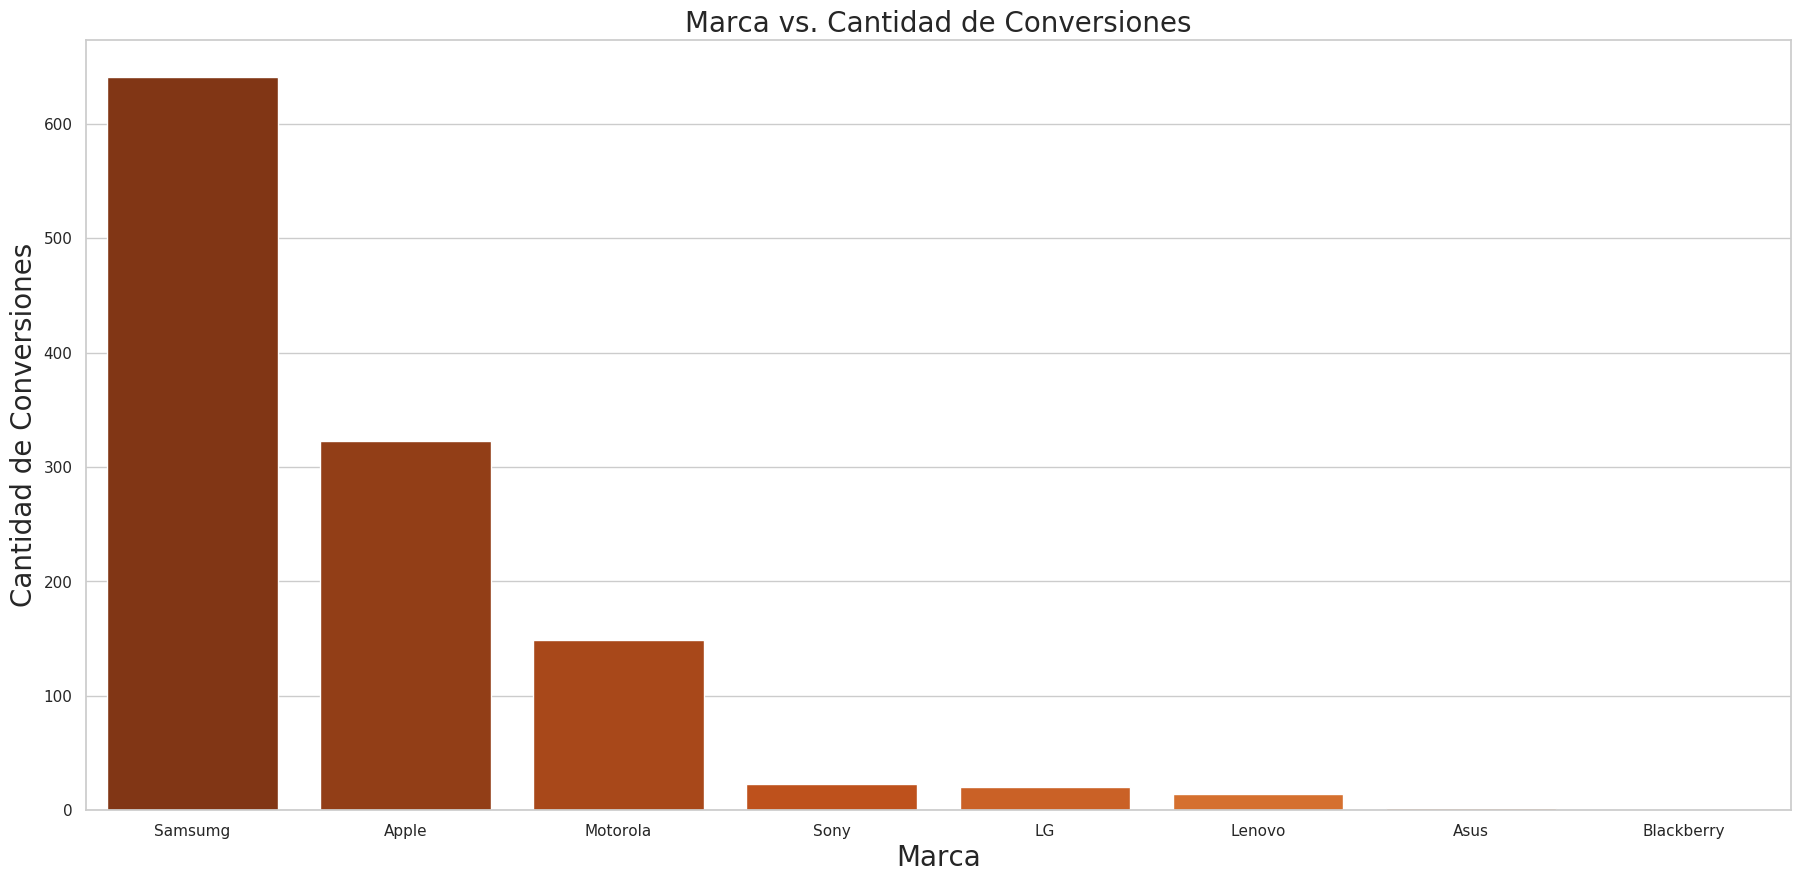

In [206]:
plt.rcParams["axes.labelsize"] = 30
marcas_plot = sns.barplot(x=marcas_conversiones["Marca"], y=marcas_conversiones['Cantidad'], orient='v', palette=sns.color_palette('Oranges_r', 15))
marcas_plot.set_title("Marca vs. Cantidad de Conversiones", fontsize=20)
marcas_plot.set_xlabel("Marca", fontsize=20)
marcas_plot.set_ylabel("Cantidad de Conversiones", fontsize=20)

##  Cantidad de checkout

In [186]:
marca_filter = df.filter(items=['model','event'])
marca_filter = marca_filter[marca_filter.model.notnull()]
marca_filter = marca_filter[marca_filter.event == "checkout"]
marca_filter["Cantidad"] = 1
marca_filter = marca_filter.groupby(by='model').agg({'Cantidad': 'sum'})
marca_filter.index
marca_filter = marca_filter.reset_index()
marca_filter.set_index('model', inplace=True)

In [188]:
apple_filter = marca_filter.filter(like='iP', axis=0)
black_filter = marca_filter.filter(like='berry', axis=0)
lg_filter = marca_filter.filter(like='LG', axis=0)
asus_filter = marca_filter.filter(like='Asus', axis=0)
motorola_filter = marca_filter.filter(like='Moto', axis=0)
samsung_filter = marca_filter.filter(like='Samsung', axis=0)
lenovo_filter = marca_filter.filter(like='Lenovo', axis=0)
sony_filter = marca_filter.filter(like='Sony', axis=0)


In [189]:
marcas_checkout = pd.DataFrame({'Marca': ["Apple", "Samsumg", "Motorola", "Lenovo", "Sony","LG","Asus", "Blackberry"], 'Cantidad': [apple_filter.Cantidad.sum(), samsung_filter.Cantidad.sum(), motorola_filter.Cantidad.sum(),lenovo_filter.Cantidad.sum(), sony_filter.Cantidad.sum() , lg_filter.Cantidad.sum(), asus_filter.Cantidad.sum(), black_filter.Cantidad.sum()]})
marcas_checkout = marcas_checkout.sort_values(by='Cantidad', ascending=False)
marcas_checkout

,Marca,Cantidad
1,Samsumg,14707
0,Apple,14154
2,Motorola,3738
5,LG,562
3,Lenovo,272
4,Sony,218
6,Asus,63
7,Blackberry,0


Text(0,0.5,'Cantidad de Checkout')

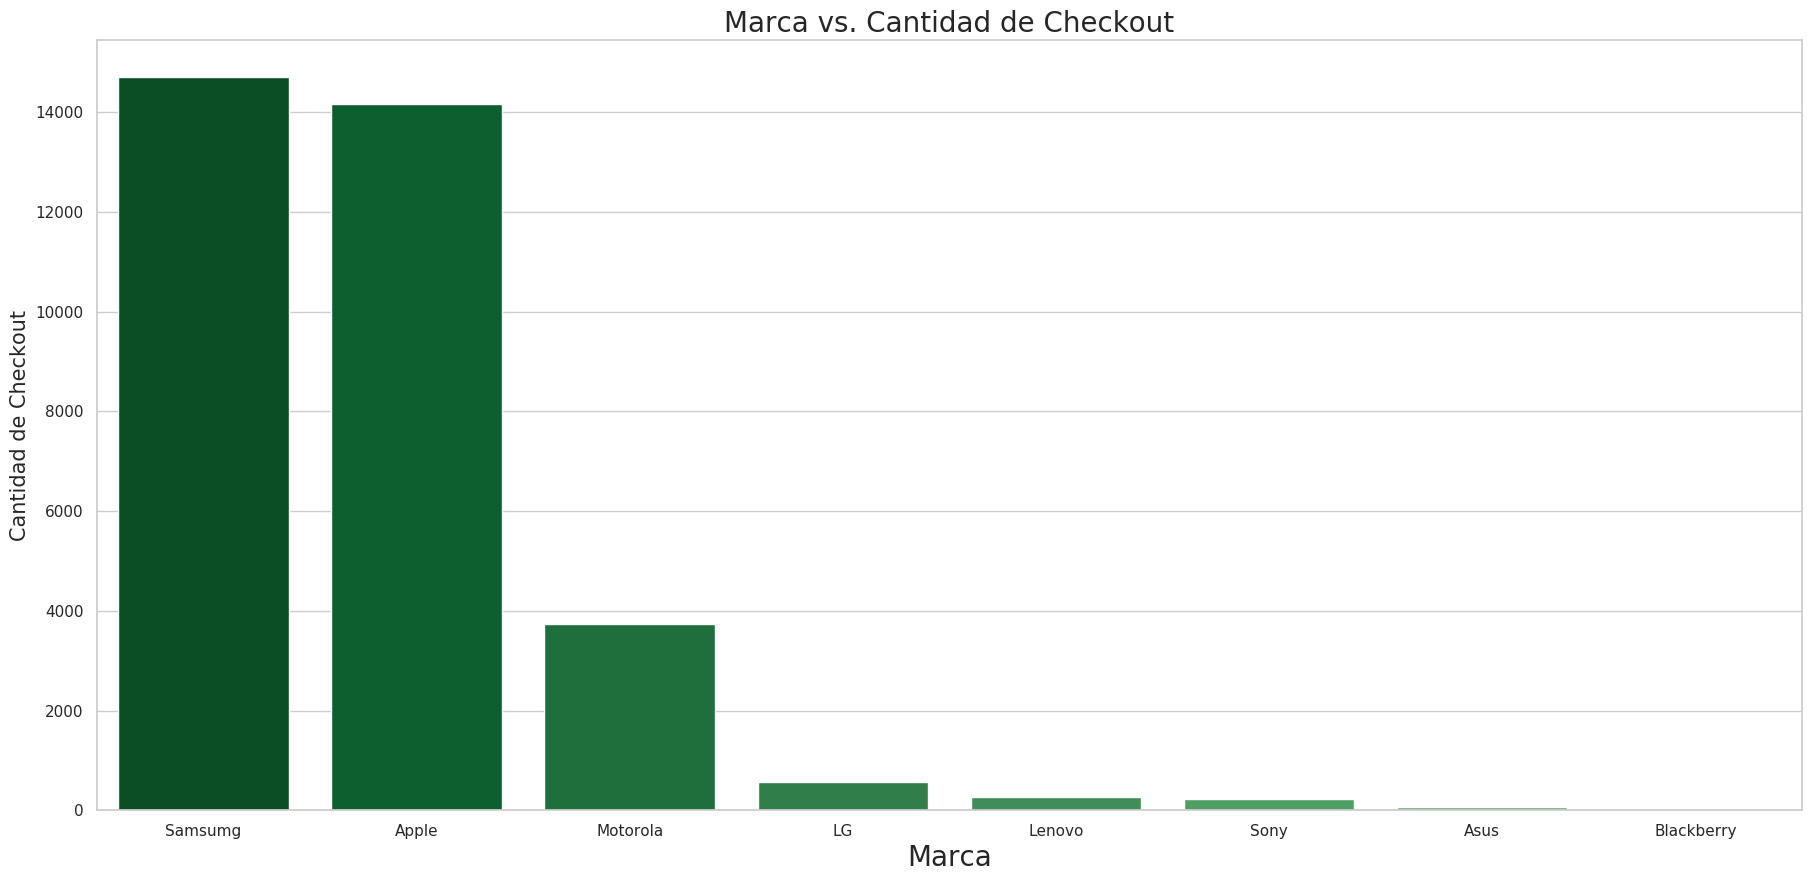

In [190]:
plt.rcParams["axes.labelsize"] = 30
marcas_plot = sns.barplot(x=marcas_checkout["Marca"], y=marcas_checkout['Cantidad'], orient='v', palette=sns.color_palette('Greens_r', 15))
marcas_plot.set_title("Marca vs. Cantidad de Checkout", fontsize=20)
marcas_plot.set_xlabel("Marca", fontsize=20)
marcas_plot.set_ylabel("Cantidad de Checkout", fontsize=15)

## Eventos LEAD

In [149]:
marca_filter = df.filter(items=['model','event'])
marca_filter = marca_filter[marca_filter.model.notnull()]
marca_filter = marca_filter[marca_filter.event == "lead"]
marca_filter["Cantidad"] = 1
marca_filter = marca_filter.groupby(by='model').agg({'Cantidad': 'sum'})
marca_filter.index
marca_filter = marca_filter.reset_index()
marca_filter.set_index('model', inplace=True)


marca_filter

,Cantidad
model,
Asus Zenfone 3 Max 16 GB,3
Blackberry Blackberry Z30,1
LG X Screen,1
LG G3 Stylus D690,1
LG G4 H815P,1
LG G4 H818P,2
LG G4 Stylus H630,3
LG G5 SE,2
LG K10,4


In [150]:
apple_filter = marca_filter.filter(like='iP', axis=0)
black_filter = marca_filter.filter(like='berry', axis=0)
lg_filter = marca_filter.filter(like='LG', axis=0)
asus_filter = marca_filter.filter(like='Asus', axis=0)
motorola_filter = marca_filter.filter(like='Moto', axis=0)
samsung_filter = marca_filter.filter(like='Samsung', axis=0)
lenovo_filter = marca_filter.filter(like='Lenovo', axis=0)
sony_filter = marca_filter.filter(like='Sony', axis=0)

In [151]:
marcas_lead = pd.DataFrame({'Marca': ["Apple", "Samsumg", "Motorola", "Lenovo", "Sony","LG","Asus", "Blackberry"], 'Cantidad': [apple_filter.Cantidad.sum(), samsung_filter.Cantidad.sum(), motorola_filter.Cantidad.sum(),lenovo_filter.Cantidad.sum(), sony_filter.Cantidad.sum() , lg_filter.Cantidad.sum(), asus_filter.Cantidad.sum(), black_filter.Cantidad.sum()]})
marcas_lead = marcas_lead.sort_values(by='Cantidad', ascending=False)
marcas_lead

,Marca,Cantidad
0,Apple,169
1,Samsumg,131
2,Motorola,84
5,LG,44
3,Lenovo,10
6,Asus,3
4,Sony,2
7,Blackberry,1


Text(0,0.5,'Cantidad de Eventos Lead')

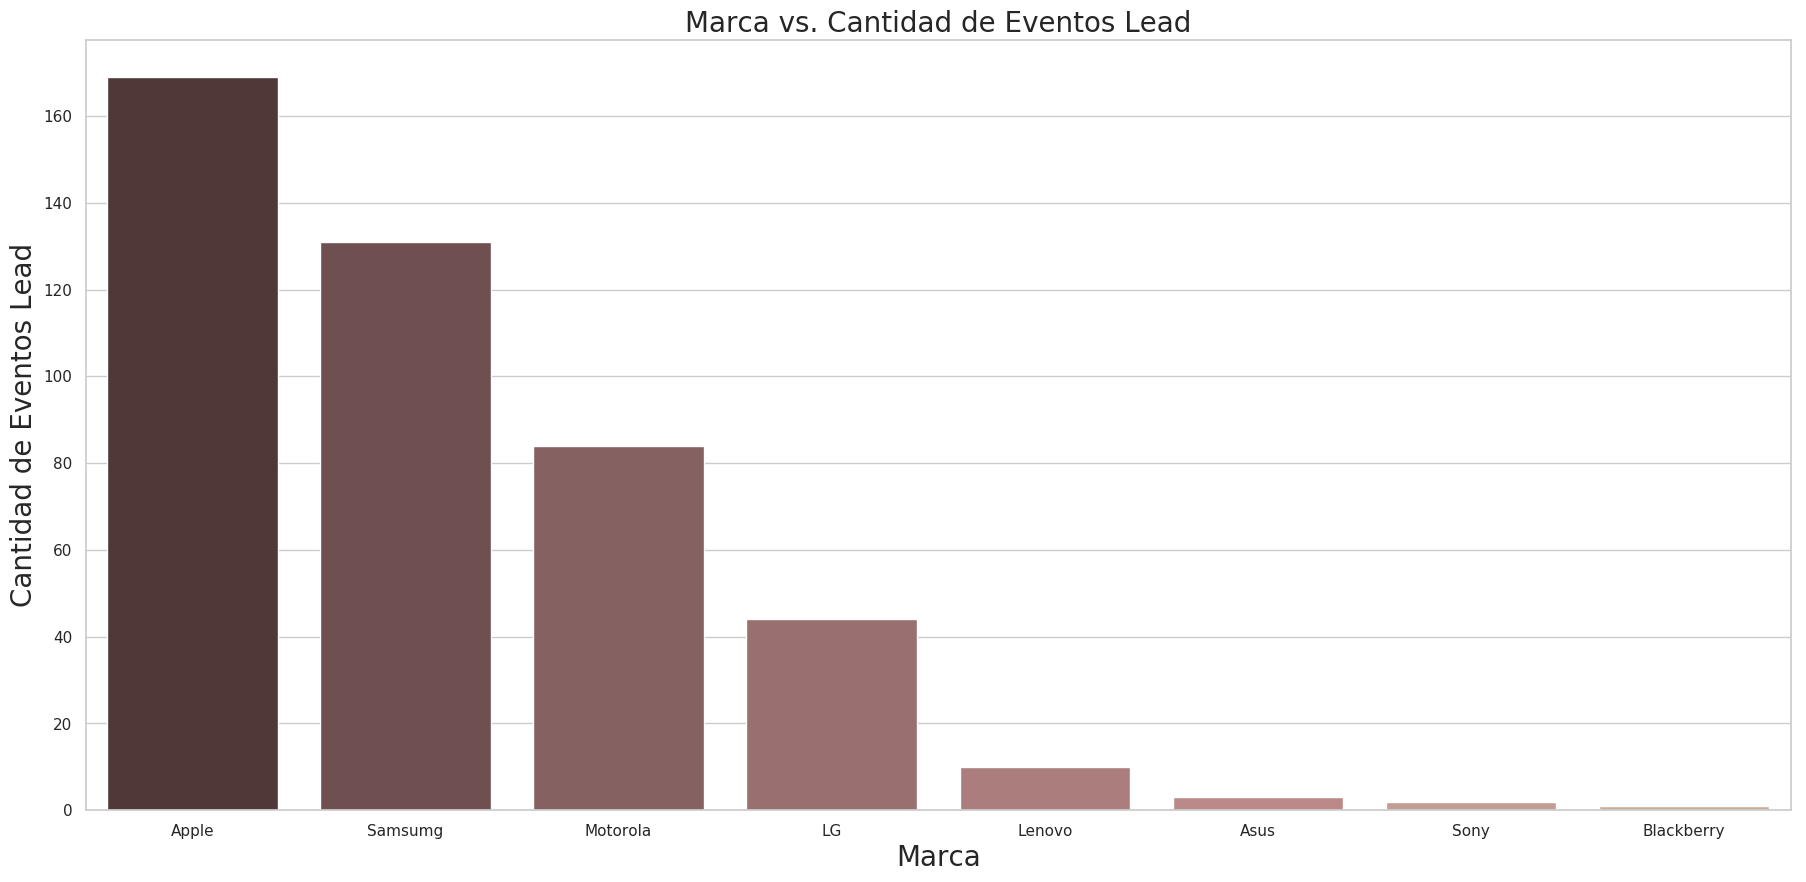

In [154]:
plt.rcParams["axes.labelsize"] = 30
marcas_plot = sns.barplot(x=marcas_lead["Marca"], y=marcas_lead['Cantidad'], orient='v',palette=sns.color_palette('pink', 15))
marcas_plot.set_title("Marca vs. Cantidad de Eventos Lead", fontsize=20)
marcas_plot.set_xlabel("Marca", fontsize=20)
marcas_plot.set_ylabel("Cantidad de Eventos Lead", fontsize=20)

## Comparo eventos conversion vs lead

In [155]:
marcas = marcas_lead

marcas.columns = ["Marca","Cantidad_lead"]
marcas = marcas.join(marcas_conversiones.Cantidad)
marcas.columns = ["Marca","Cantidad_lead", "Cantidad_Conversiones"]
marcas

,Marca,Cantidad_lead,Cantidad_Conversiones
0,Apple,169,323
1,Samsumg,131,641
2,Motorola,84,149
5,LG,44,20
3,Lenovo,10,14
6,Asus,3,2
4,Sony,2,23
7,Blackberry,1,0


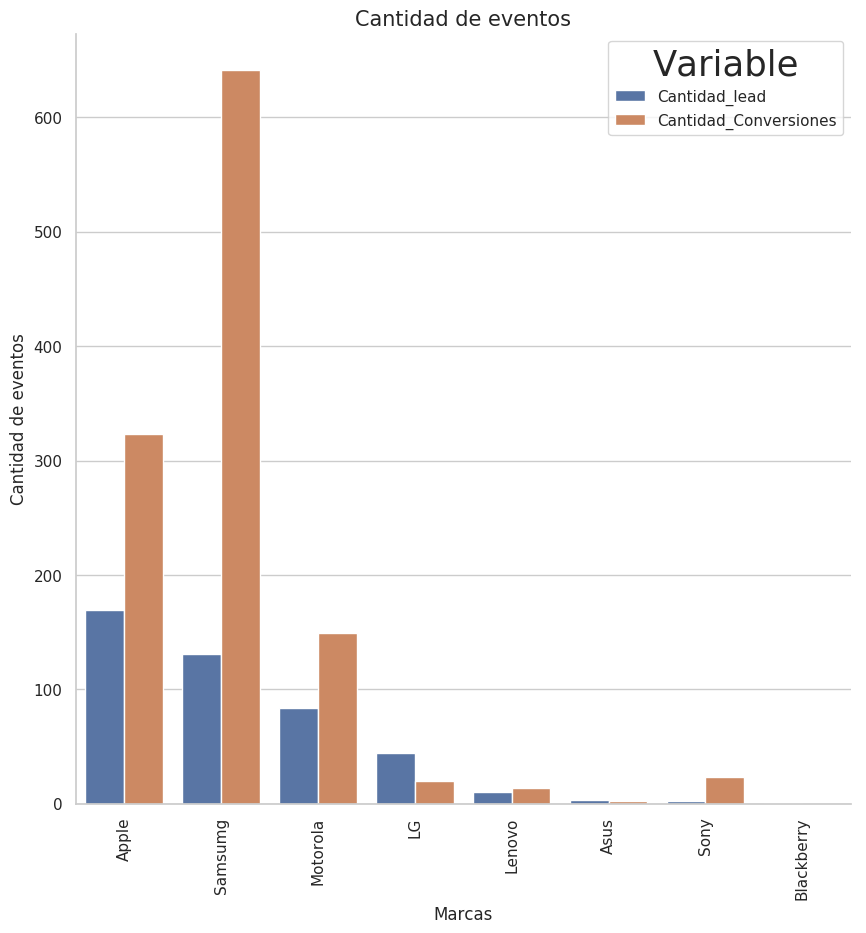

In [184]:
fig, ax1 = plt.subplots(figsize=(10, 10))
tidy = (
    marcas.set_index('Marca')
      .stack()  # un-pivots the data 
      .reset_index()  # moves all data out of the index
      .rename(columns={'level_1': 'Variable', 0: 'Value'})
)
g = sns.barplot(x='Marca', y='Value', hue='Variable', data=tidy, ax=ax1, orient="v")
for item in g.get_xticklabels():
    item.set_rotation(90)

g.set_title("Cantidad de eventos", fontsize=15)
g.set_xlabel("Marcas", fontsize=12)
g.set_ylabel("Cantidad de eventos", fontsize=12)

sns.despine(fig)

## ANALIZO LOS MODELOS CON MAS VISITAS

In [157]:
events_short = df.filter(items=['model','storage','event','sku'])
model_events = events_short[events_short.model.notnull()]
model_events["Cantidad_Eventos"] = 1
model_events = model_events.groupby(['model']).agg({'Cantidad_Eventos':'sum'})
model_events

,Cantidad_Eventos
model,
Asus Live,4
Asus Zenfone 2,142
Asus Zenfone 2 Deluxe,203
Asus Zenfone 2 Laser,12
Asus Zenfone 3 Max 32 GB,132
Asus Zenfone 3 Max 16 GB,174
Asus Zenfone 3 Zoom,44
Asus Zenfone 5,729
Asus Zenfone 6,590


In [158]:
model_events = model_events.sort_values(by='Cantidad_Eventos', ascending=False).head(10)
model_events

,Cantidad_Eventos
model,
iPhone 6,50916
iPhone 5s,44878
iPhone 6S,39296
iPhone 7,27556
Samsung Galaxy S7 Edge,23926
Samsung Galaxy S7,19337
iPhone 7 Plus,18792
Samsung Galaxy S8,16959
iPhone SE,16531


In [159]:
model_events = model_events.reset_index()

Text(0,0.5,'Modelo')

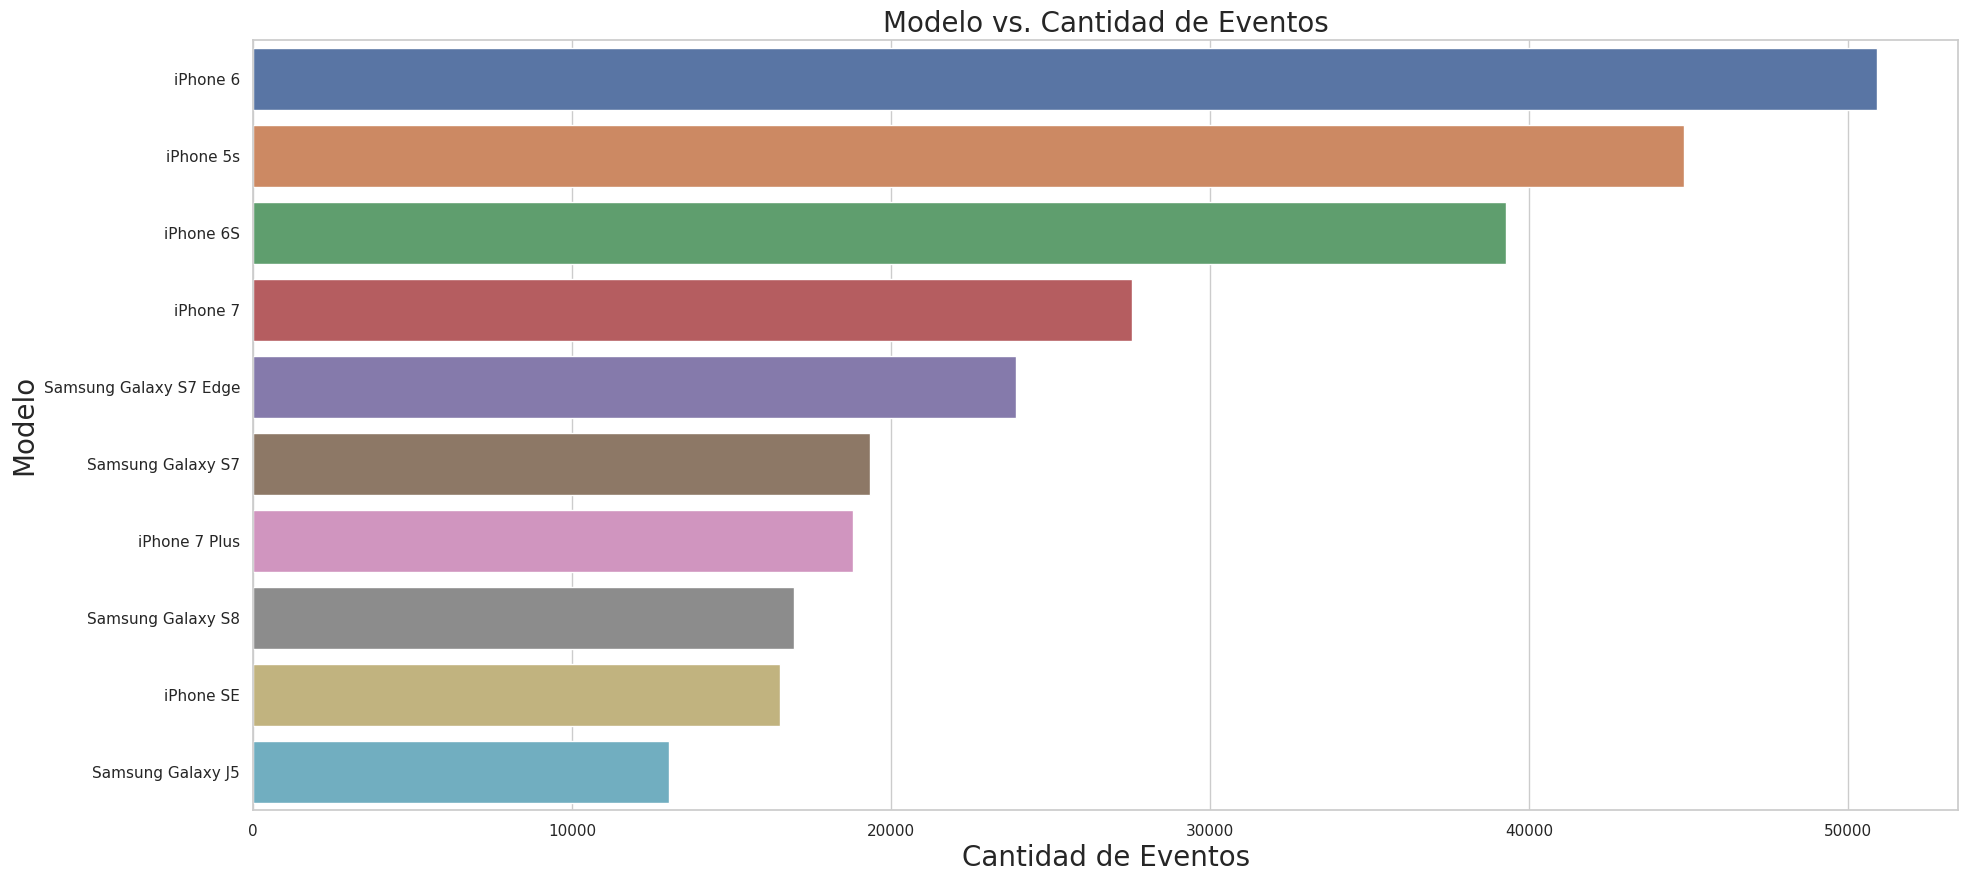

In [209]:
plt.rcParams["axes.labelsize"] = 20
model_events_plot = sns.barplot(x=model_events["Cantidad_Eventos"] , y=model_events['model'], orient='h')
model_events_plot.set_title("Modelo vs. Cantidad de Eventos", fontsize=20)
model_events_plot.set_xlabel("Cantidad de Eventos", fontsize=20)
model_events_plot.set_ylabel("Modelo", fontsize=20)

### Cantidad de conversiones

In [222]:
model_conversion = events_short[events_short.event == "conversion"]
model_conversion["Cantidad_Conv"] = 1
model_conversion = model_conversion.groupby(['model']).agg({'Cantidad_Conv':'sum'})
model_conversion

,Cantidad_Conv
model,
Asus Zenfone 3 Max 16 GB,1
Asus Zenfone 5,1
LG G3 D855,6
LG G4 H815P,2
LG G4 H818P,1
LG K10,3
LG K10 Novo,2
LG K10 TV,3
LG L Prime D337,3


In [226]:
model_conversion = model_conversion.sort_values(by='Cantidad_Conv', ascending=False)
model_conversion = model_conversion.head(10)
model_conversion

,model,Cantidad_Conv
0,Samsung Galaxy J5,88
1,iPhone 5s,84
2,iPhone 6,71
3,Samsung Galaxy S6 Flat,39
4,iPhone 6S,37
5,iPhone 5c,33
6,Motorola Moto G4 Plus,30
7,Motorola Moto G3 4G,30
8,Samsung Galaxy J7,28
9,Samsung Galaxy A5,27


In [227]:
model_conversion = model_conversion.reset_index()

Text(0,0.5,'Modelo')

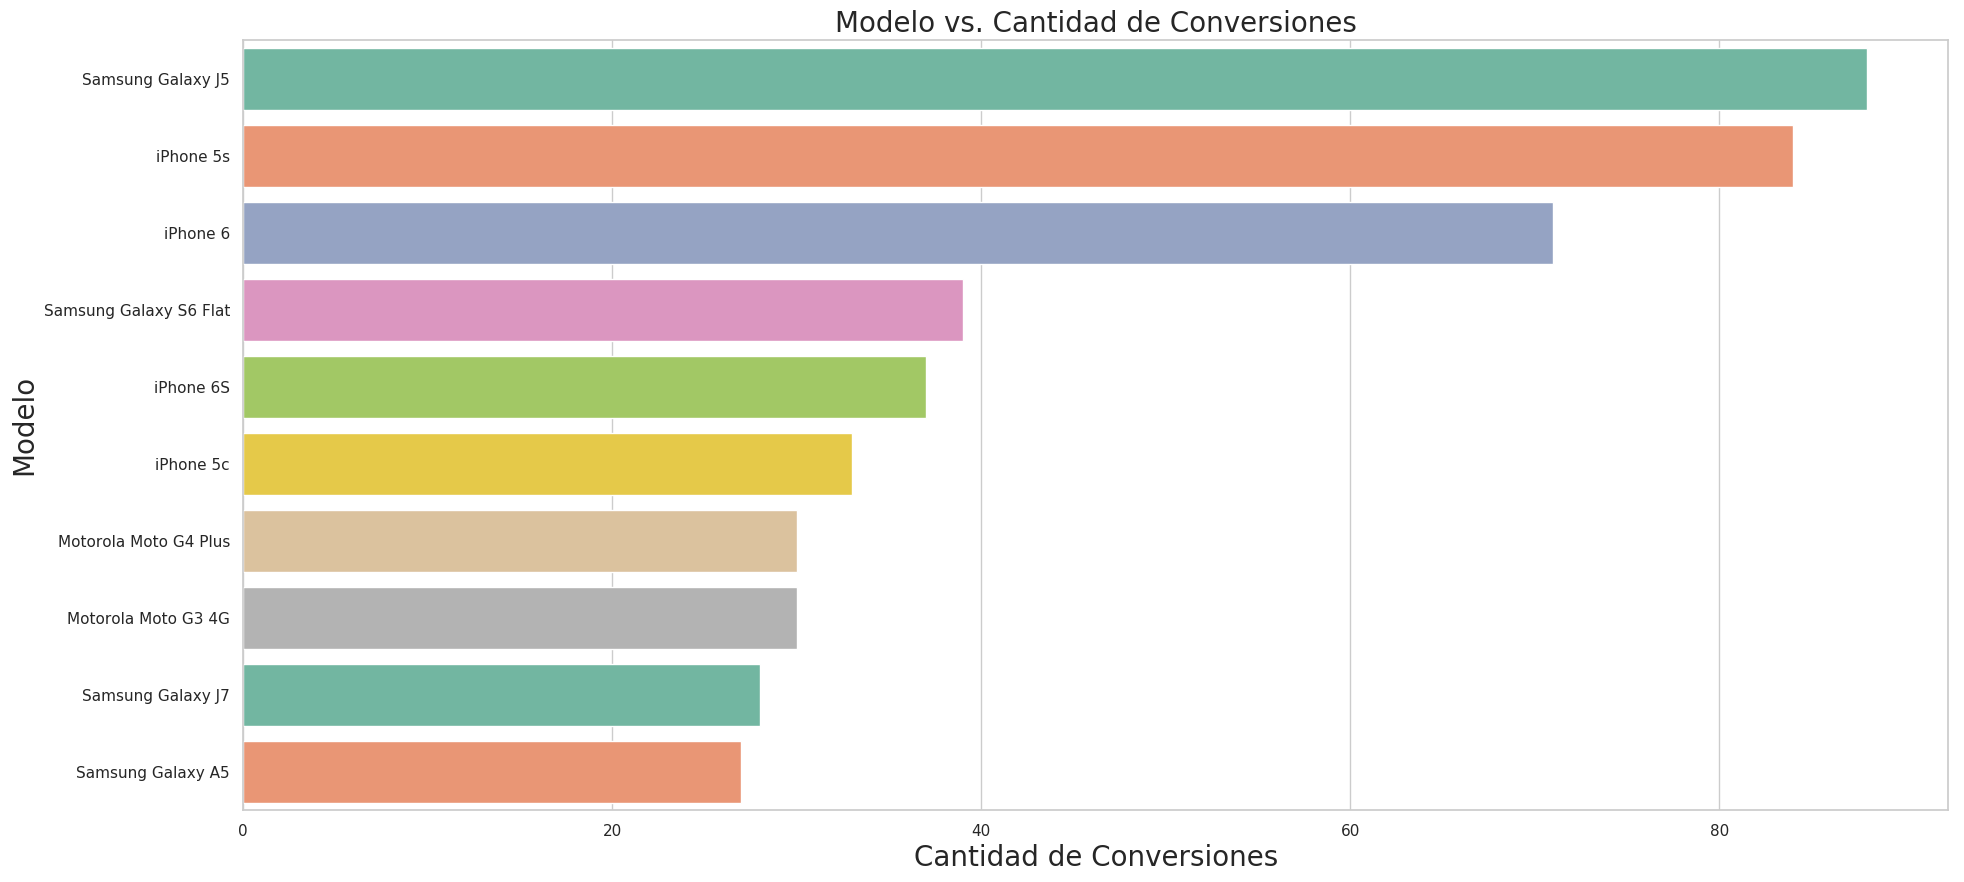

In [228]:
plt.rcParams["axes.labelsize"] = 30
model_conversion_plot = sns.barplot(x=model_conversion["Cantidad_Conv"], y=model_conversion['model'], orient='h',palette=sns.color_palette("Set2", 10))
model_conversion_plot.set_title("Modelo vs. Cantidad de Conversiones", fontsize=20)
model_conversion_plot.set_xlabel("Cantidad de Conversiones", fontsize=20)
model_conversion_plot.set_ylabel("Modelo", fontsize=20)

### Cantidad de checkouts de dispositivos 

In [219]:
model_checkout = events_short[events_short.event == "checkout"]
model_checkout["Cantidad_Check"] = 1
model_checkout = model_checkout.groupby(['model']).agg({'Cantidad_Check':'sum'})
model_checkout

,Cantidad_Check
model,
Asus Zenfone 2,4
Asus Zenfone 2 Deluxe,2
Asus Zenfone 3 Max 32 GB,8
Asus Zenfone 3 Max 16 GB,29
Asus Zenfone 3 Zoom,2
Asus Zenfone 5,8
Asus Zenfone 6,7
Asus Zenfone Go,3
LG X Screen,9


In [220]:
model_checkout = model_checkout.sort_values(by='Cantidad_Check', ascending=False).head(20)
model_checkout = model_checkout.reset_index()
model_checkout

,model,Cantidad_Check
0,iPhone 6,3295
1,iPhone 5s,2744
2,iPhone 6S,2308
3,Samsung Galaxy J5,1918
4,Samsung Galaxy S7,1234
5,iPhone 7,1205
6,Samsung Galaxy S8,1074
7,iPhone 7 Plus,924
8,Samsung Galaxy J7 Prime,866
9,Samsung Galaxy S6 Flat,844


Text(0,0.5,'Modelo')

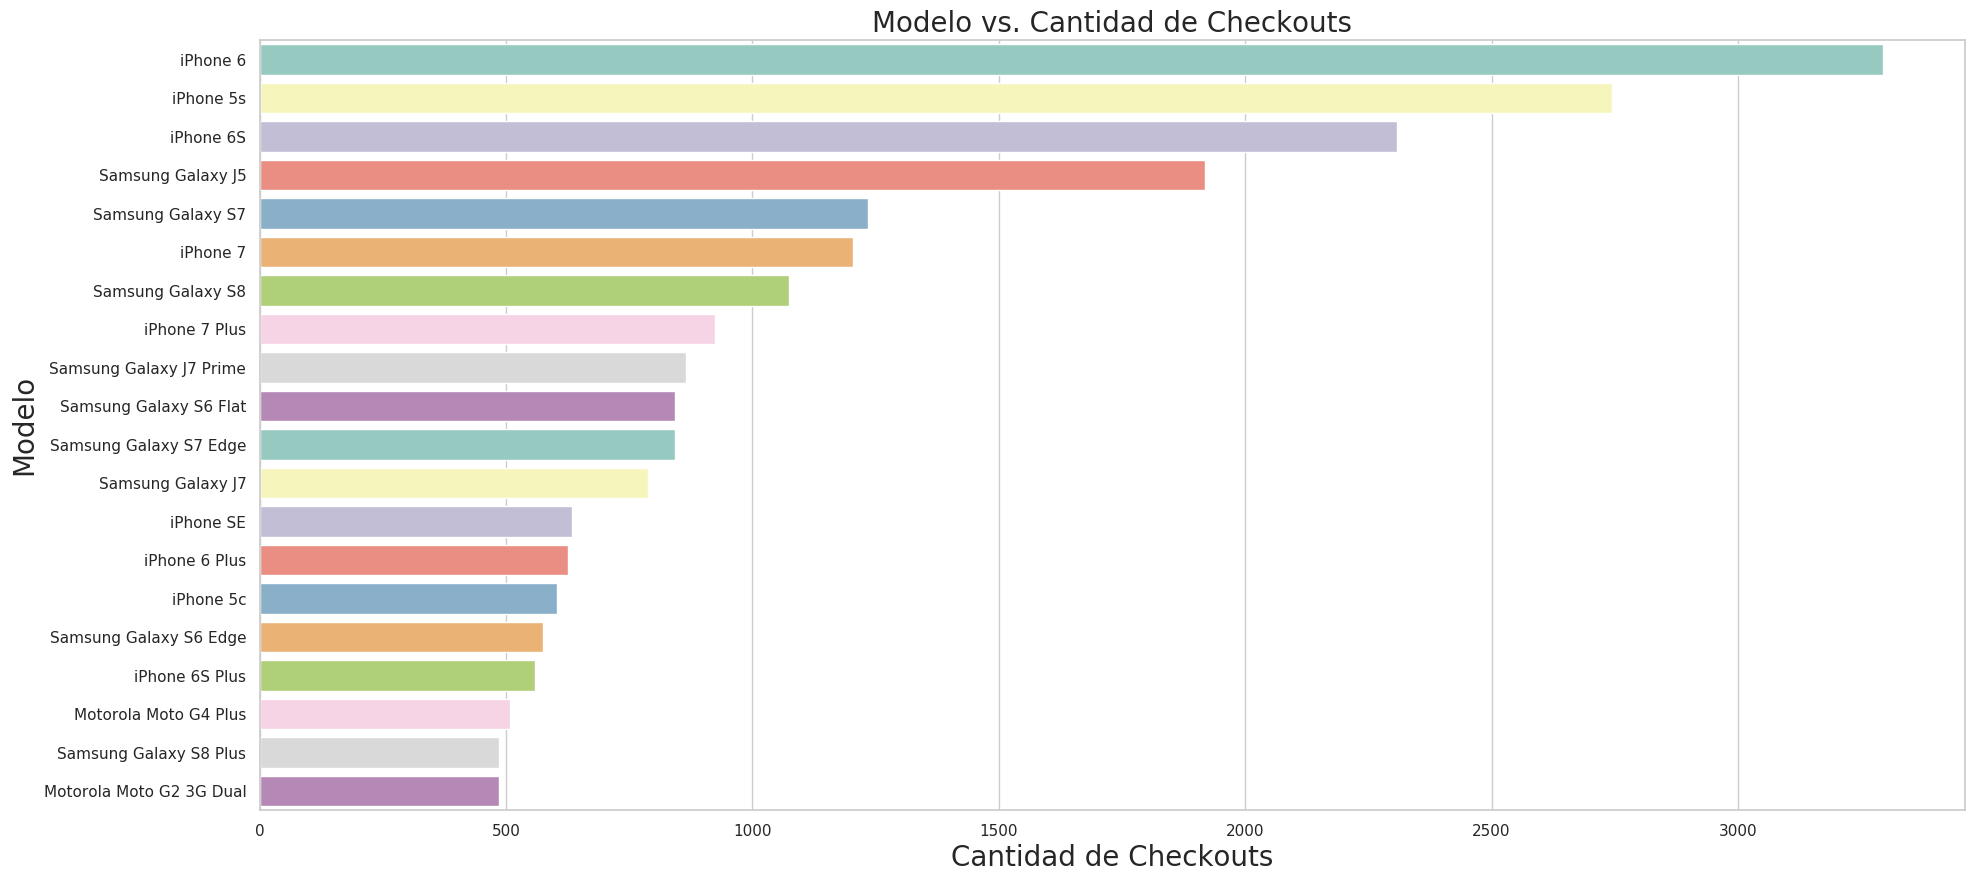

In [221]:
plt.rcParams["axes.labelsize"] = 30
model_checkout_plot = sns.barplot(x=model_checkout["Cantidad_Check"], y=model_checkout['model'], orient='h', palette=sns.color_palette("Set3", 10))
model_checkout_plot.set_title("Modelo vs. Cantidad de Checkouts", fontsize=20)
model_checkout_plot.set_xlabel("Cantidad de Checkouts", fontsize=20)
model_checkout_plot.set_ylabel("Modelo", fontsize=20)

### Cantidad de eventos lead de dispositivos

In [215]:
model_lead = events_short[events_short.event == "lead"]
model_lead["Cantidad_Lead"] = 1
model_lead = model_lead.groupby(['model']).agg({'Cantidad_Lead':'sum'})

model_lead

,Cantidad_Lead
model,
Asus Zenfone 3 Max 16 GB,3
Blackberry Blackberry Z30,1
LG X Screen,1
LG G3 Stylus D690,1
LG G4 H815P,1
LG G4 H818P,2
LG G4 Stylus H630,3
LG G5 SE,2
LG K10,4


In [216]:
model_lead = model_lead.sort_values(by='Cantidad_Lead', ascending=False).head(10)
model_lead = model_lead.reset_index()
model_lead

,model,Cantidad_Lead
0,iPhone 6 Plus,35
1,iPhone 6S Plus,31
2,Samsung Galaxy J7 Prime,26
3,iPhone 6S,21
4,iPhone 8,20
5,Motorola Moto G4 Plus,20
6,Samsung Galaxy On 7,15
7,Motorola Moto G5 Plus,15
8,Samsung Galaxy A9 Pro 2016,15
9,LG K10 Novo,12


Text(0,0.5,'Modelo')

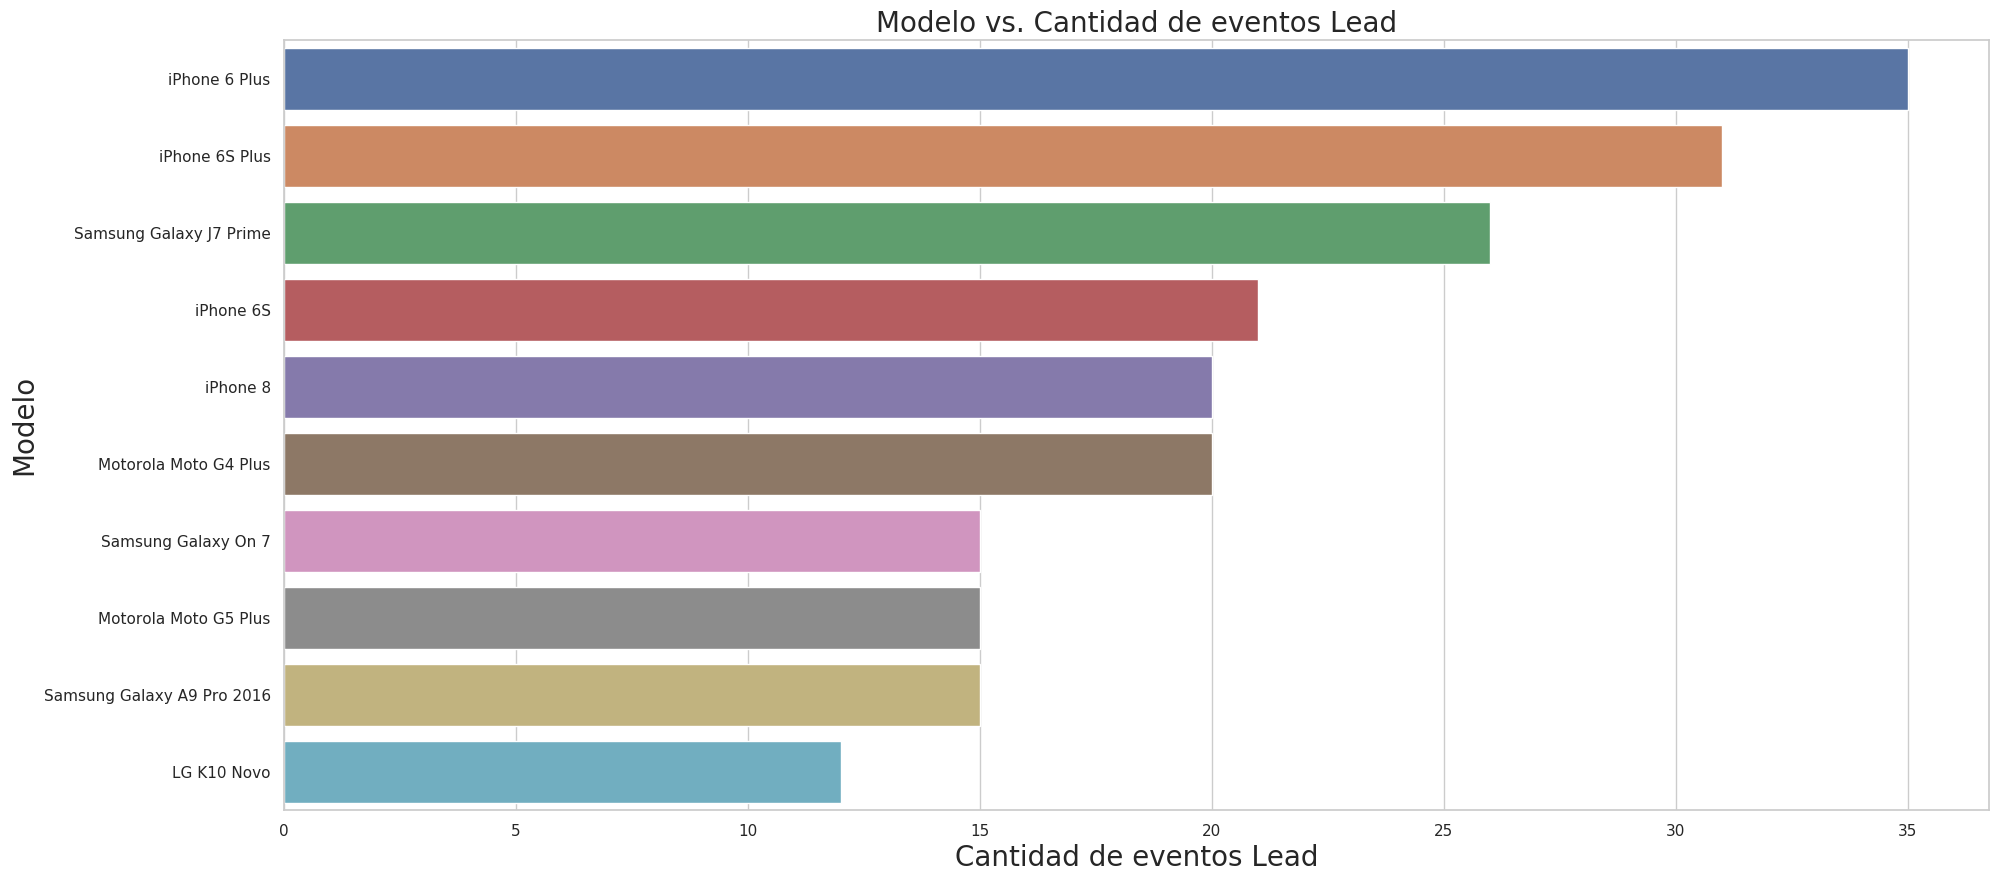

In [218]:
plt.rcParams["axes.labelsize"] = 30
model_lead_plot = sns.barplot(x=model_lead["Cantidad_Lead"], y=model_lead['model'], orient='h')
model_lead_plot.set_title("Modelo vs. Cantidad de eventos Lead", fontsize=20)
model_lead_plot.set_xlabel("Cantidad de eventos Lead", fontsize=20)
model_lead_plot.set_ylabel("Modelo", fontsize=20)